<a href="https://colab.research.google.com/github/NatthawanSrisan/Early-Detection-Rare-Cancer/blob/main/Natthawan_Progress_report_Data_Exploration_and_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Gallbladder Cancer Risk Prediction using Clinical Data**

**EDA (Exploratory Data Analysis)**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive (1).zip


In [2]:
import zipfile
import os

# unzip archive.zip all /content
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content")

os.listdir("/content")

['.config',
 'archive.zip',
 'archive (1).zip',
 'gallbladder_cancer_dataset.csv',
 'sample_data']

**Data Loading and Exploration**
*Explanation:*
In the first step, the dataset was loaded from Kaggle, containing 1,000 patient samples and 21 features. These features include demographic information (such as gender, age, and BMI) as well as clinical factors (such as smoking history, diabetes, gallstones, CA 19-9 and CEA levels, etc.).
The dataset was then examined to understand its structure by checking for missing values, data types, and general patterns. This initial exploration helped identify potential data quality issues and provided an overview of the clinical and demographic variables relevant to gallbladder cancer risk prediction.

In [3]:
import pandas as pd
path = "/content/gallbladder_cancer_dataset.csv"
df = pd.read_csv(path)
df.head()

,Patient_ID,Age,Gender,BMI,Ethnicity,Smoking_History,Alcohol_Consumption,Family_History,Diabetes,Gallstones,...,Jaundice,Weight_Loss,Tumor_Size,Lymph_Node_Involvement,Stage,CEA_Level,CA19-9_Level,Treatment_Type,Survival_Months,Outcome
0,PID_1,68,Female,27.7,Hispanic,Yes,No,Yes,Yes,No,...,Yes,0.4,2.9,No,II,8.48,228.94,Chemotherapy,23,Deceased
1,PID_2,81,Female,37.3,Asian,No,No,No,Yes,No,...,Yes,7.2,8.8,No,II,17.96,121.62,Chemotherapy,33,Deceased
2,PID_3,58,Male,27.5,African,Yes,Yes,Yes,No,No,...,No,5.4,9.5,No,III,3.67,363.39,Chemotherapy,52,Deceased
3,PID_4,44,Female,28.4,Caucasian,Yes,Yes,Yes,Yes,Yes,...,Yes,5.1,5.7,Yes,III,19.91,255.43,Chemotherapy,47,Deceased
4,PID_5,72,Male,39.8,Caucasian,No,Yes,No,Yes,No,...,No,2.4,4.2,No,IV,2.82,506.69,Chemotherapy,18,Deceased


In [4]:
!pip install -U pandas
import pandas as pd
pd.__version__

'2.3.3'

In [5]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/gallbladder_cancer_dataset.csv")


print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()

# statistics column
num_desc = df.select_dtypes(include=[np.number]).describe()
num_desc

# Missing values (high - low)
df.isnull().sum().sort_values(ascending=False)

Shape: (1000, 21)
Columns: ['Patient_ID', 'Age', 'Gender', 'BMI', 'Ethnicity', 'Smoking_History', 'Alcohol_Consumption', 'Family_History', 'Diabetes', 'Gallstones', 'Abdominal_Pain', 'Jaundice', 'Weight_Loss', 'Tumor_Size', 'Lymph_Node_Involvement', 'Stage', 'CEA_Level', 'CA19-9_Level', 'Treatment_Type', 'Survival_Months', 'Outcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              1000 non-null   object 
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   BMI                     1000 non-null   float64
 4   Ethnicity               1000 non-null   object 
 5   Smoking_History         1000 non-null   object 
 6   Alcohol_Consumption     1000 non-null   object 
 7   Family_History          1000 non-null   object 
 8   Diabetes               

,0
Patient_ID,0
Age,0
Gender,0
BMI,0
Ethnicity,0
Smoking_History,0
Alcohol_Consumption,0
Family_History,0
Diabetes,0
Gallstones,0


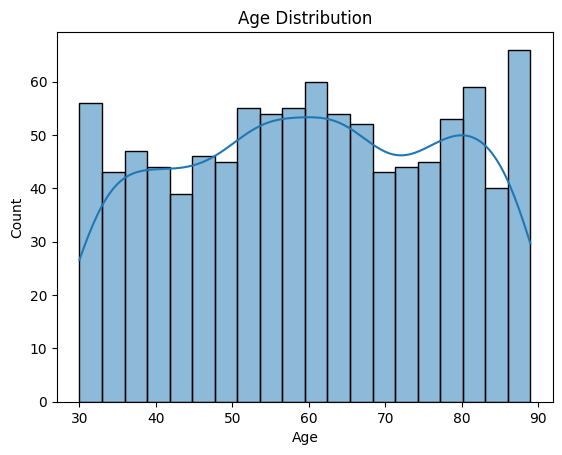

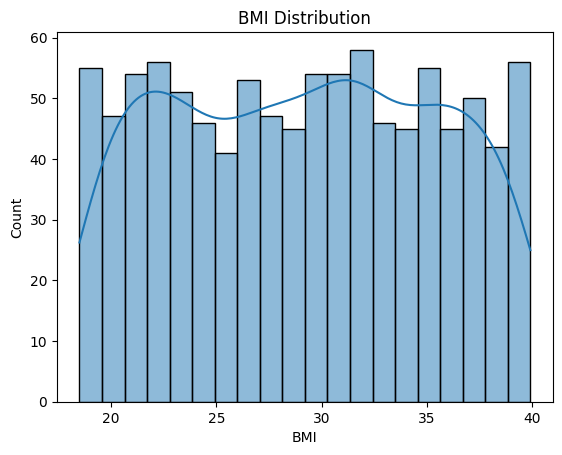

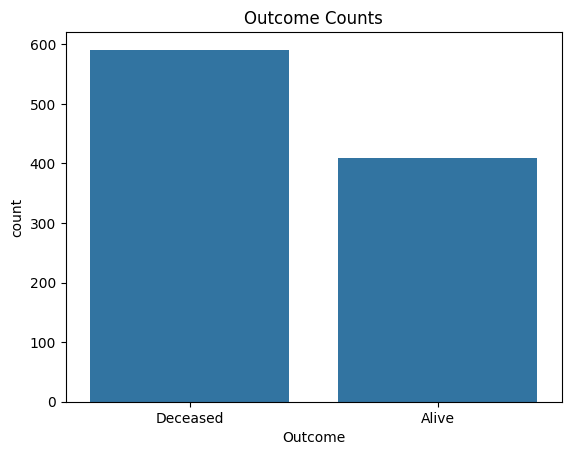

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# check column
if 'Age' in df.columns:
    plt.figure(); sns.histplot(df['Age'], bins=20, kde=True)
    plt.title('Age Distribution'); plt.show()

if 'BMI' in df.columns:
    plt.figure(); sns.histplot(df['BMI'], bins=20, kde=True)
    plt.title('BMI Distribution'); plt.show()

if 'Outcome' in df.columns:
    plt.figure(); sns.countplot(x='Outcome', data=df)
    plt.title('Outcome Counts'); plt.show()

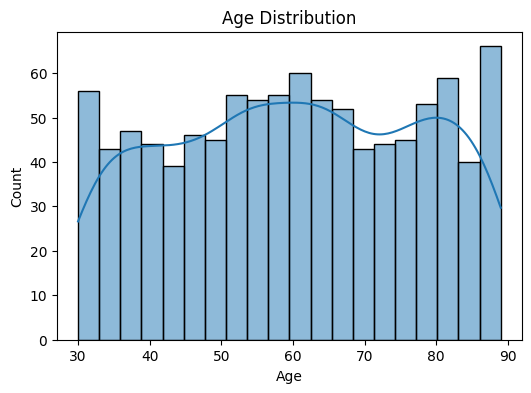

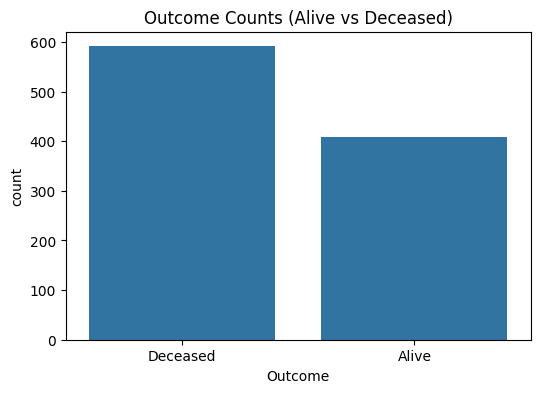

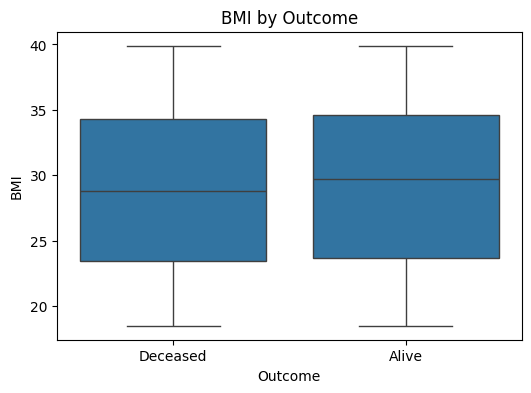

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Counts (Alive vs Deceased)')
plt.show()

# BMI by Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Outcome')
plt.show()

**Data Preprocessing + Model Training**

**Data Preprocessing**
*Explanation :*
The LabelEncoder was used to convert categorical variables (such as Yes/No or Male/Female) into numerical values, since most machine learning algorithms can only process numerical data.
After encoding, the dataset was divided into training and testing subsets using the train_test_split() function, with an 80:20 ratio.
This ensures that the model is trained on one portion of the data (80%) and evaluated on previously unseen data (20%), allowing a fair assessment of its generalization ability.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. transfer to numbers
df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# 2. separate features and target
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# 3. train/test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of train set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of train set: (800, 20)
Shape of test set: (200, 20)


**Model Training**
*Explanation :*
Three supervised machine learning models were tested in this study:
 1. Logistic Regression – A simple and interpretable model that performs well on small to medium-sized datasets. It serves as a strong baseline for binary classification problems such as predicting the presence or absence of cancer.
 2. Random Forest – An ensemble model that combines the predictions of multiple decision trees to improve accuracy and reduce overfitting. It can handle nonlinear relationships and interactions among clinical features effectively.
 3. XGBoost (Extreme Gradient Boosting) – An advanced boosting technique that builds sequential trees to correct errors from previous ones. It often achieves high accuracy on large and complex datasets.

However, in this study, the performance of XGBoost was close to that of Random Forest, likely because the dataset had a limited number of features and records, which reduces the advantage of complex boosting methods.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# results
results = []

# Logistic Regression
log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1": f1_score(y_test, y_pred_log)
})

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf)
})

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1": f1_score(y_test, y_pred_xgb)
})

# results
results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:51:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression     0.545   0.565714  0.868421  0.685121
1        Random Forest     0.555   0.575758  0.833333  0.681004
2              XGBoost     0.530   0.573529  0.684211  0.624000


**Evaluation & Visualization**

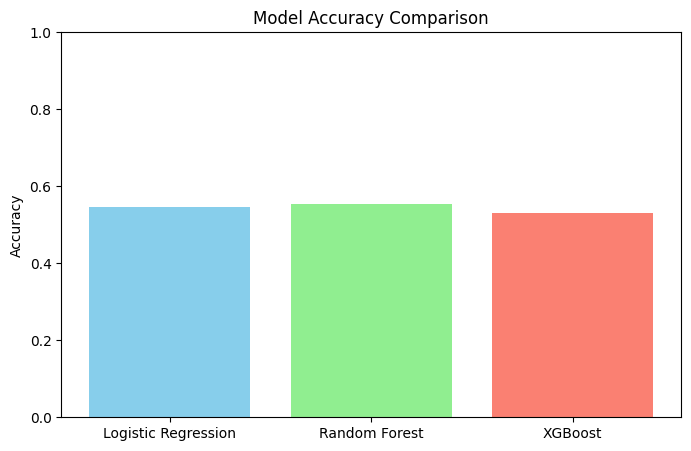

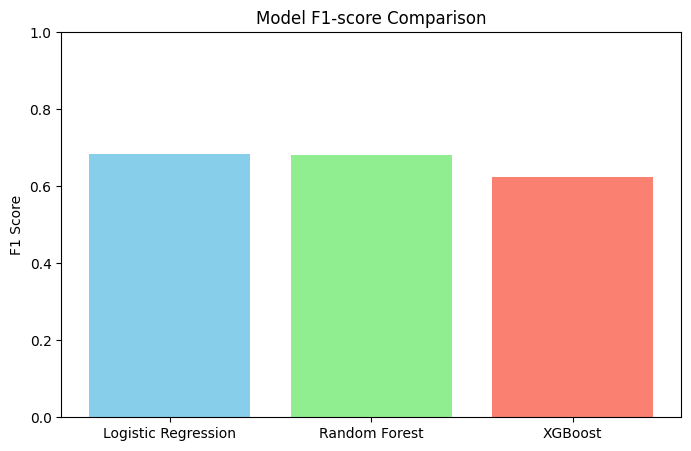

In [10]:
import matplotlib.pyplot as plt

# Plot comparison of Accuracy
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['skyblue','lightgreen','salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()

# Plot comparison of F1-score
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['F1'], color=['skyblue','lightgreen','salmon'])
plt.title('Model F1-score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0,1)
plt.show()

**Evaluation & Visaualization**
*Explanation :*
The performance of each model was compared using bar charts that visualize both Accuracy and F1-score.
The results show that the Random Forest model achieved the highest accuracy (approximately 0.555), meaning it correctly classified the most samples overall.
Meanwhile, the Logistic Regression model achieved the highest recall (approximately 0.86), which is especially important for detecting patients in the early stages of gallbladder cancer, since a high recall indicates that the model successfully identifies most positive (cancer) cases.

**Result Interpretation**
*Explanation :*
All three models demonstrated moderate performance, which reflects the complexity and variability of clinical data used in cancer prediction.
This suggests that gallbladder cancer diagnosis is influenced by multiple interrelated medical factors that may not be fully captured in the available dataset.
In future work, improvements could include feature engineering (creating new variables or refining existing ones to better represent clinical relationships) and hyperparameter tuning (adjusting model settings such as learning rate, number of trees, or regularization strength) to enhance overall accuracy and the model’s ability to identify high-risk patients more effectively.

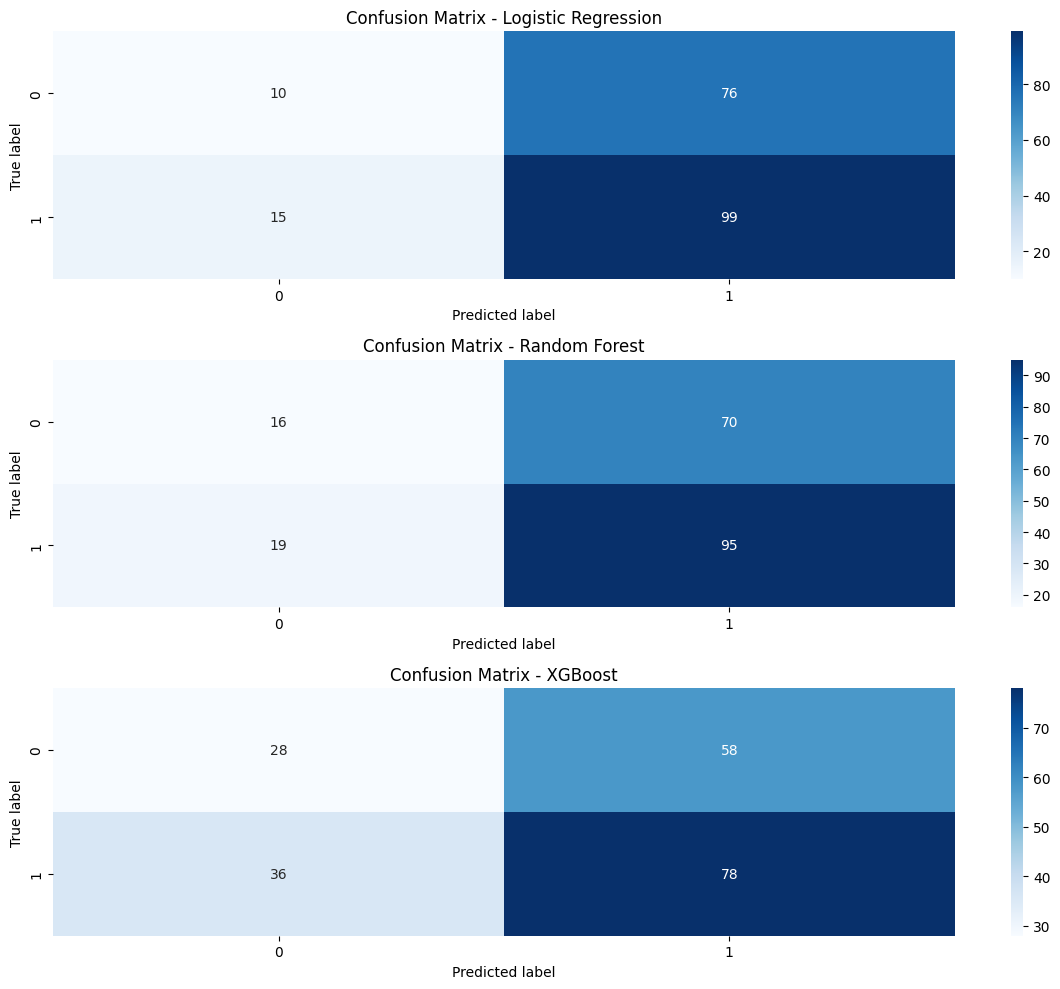

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# (Model name: Logistic = log_model, RF = rf_model, XGB = xgb_model)
y_pred_lr  = log_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

cm_lr  = confusion_matrix(y_test, y_pred_lr)
cm_rf  = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(12,10))

plt.subplot(3,1,1)
sns.heatmap(cm_lr, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted label'); plt.ylabel('True label')

plt.subplot(3,1,2)
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted label'); plt.ylabel('True label')

plt.subplot(3,1,3)
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted label'); plt.ylabel('True label')

plt.tight_layout()
plt.savefig("confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

*Explanation:*
 * The values on the diagonal represent the number of correctly predicted samples.

 * The top-left cell (True Negative) indicates cases where the model correctly predicted “No Cancer.”
 * The bottom-right cell (True Positive) indicates cases where the model correctly predicted “Cancer.”
 * The off-diagonal cells represent incorrect predictions — either predicting cancer when it is not present (False Positive) or missing actual cancer cases (False Negative).

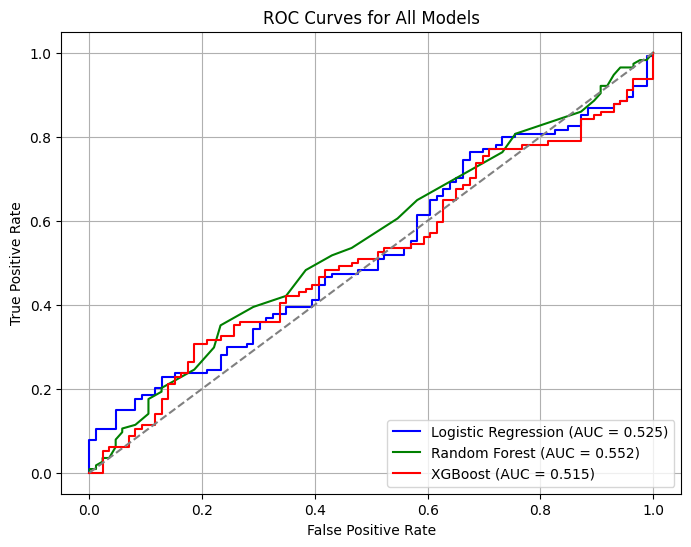

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC for each models
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')

# plot
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig("roc_curves.png", dpi=300, bbox_inches='tight')
plt.show()

*Explanation :*
 * A ROC curve that rises sharply toward the top-left corner and has an AUC (Area Under the Curve) value close to 1.0 indicates that the model can effectively distinguish between positive (cancer) and negative (non-cancer) cases.
 * If the ROC curve is close to the diagonal line, it means the model’s predictions are almost random — it cannot reliably differentiate between the two classes.

Step Plan for Sprint 2 — “Model Optimization and Class Balancing”

🩺 Objective:

Improve accuracy, recall, and F1-score by:
 • Applying Feature Scaling
 • Handling Class Imbalance using SMOTE
 • Performing Hyperparameter Tuning
 • Visualizing performance improvements

⸻

🧩 Step 1: Load and Prepare Data

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# โหลดข้อมูล
df = pd.read_csv('/content/gallbladder_cancer_dataset.csv')

# เข้ารหัสข้อมูล
le = LabelEncoder()
df_encoded = df.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# แยก features และ target
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# แบ่ง train/test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 2: Handle Class Imbalance (SMOTE)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Outcome
1    477
0    323
Name: count, dtype: int64
After SMOTE: Outcome
0    477
1    477
Name: count, dtype: int64


Step 3: Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

Step 4: Logistic Regression Tuning

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=3000), param_grid, cv=5, scoring='f1')
grid_lr.fit(X_train_scaled, y_train_res)

print("Best Parameters:", grid_lr.best_params_)
print("Best F1 Score:", grid_lr.best_score_)

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best F1 Score: 0.6126614713186008


Step 5.1: Random Forest Tuning

In [17]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train_scaled, y_train_res)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best F1 Score (Random Forest):", grid_rf.best_score_)

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score (Random Forest): 0.6699940097852812


Step 5.2: XGBoost Tuning

In [18]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False),
                        param_grid_xgb, cv=5, scoring='f1')
grid_xgb.fit(X_train_scaled, y_train_res)

print("Best Parameters (XGBoost):", grid_xgb.best_params_)
print("Best F1 Score (XGBoost):", grid_xgb.best_score_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:29:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:29:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:29:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:29:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:29:38] WARNING: /w

Best Parameters (XGBoost): {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best F1 Score (XGBoost): 0.6230831733531411


best model predictions

In [19]:
# Retrain best Logistic Regression
best_lr = LogisticRegression(C=0.1, solver='liblinear', max_iter=3000)
best_lr.fit(X_train_scaled, y_train_res)

# Retrain best Random Forest
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
best_rf.fit(X_train_scaled, y_train_res)

# Retrain best XGBoost
best_xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    eval_metric='logloss',
    use_label_encoder=False
)
best_xgb.fit(X_train_scaled, y_train_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:57:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

results_tuned = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_proba)

    results_tuned.append([name, acc, prec, rec, f1, auc])

import pandas as pd
results_tuned_df = pd.DataFrame(
    results_tuned,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]
)
results_tuned_df

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.490,0.553571,0.543860,0.548673,0.526724
1,Random Forest,0.535,0.581395,0.657895,0.617284,0.529682
2,XGBoost,0.550,0.603448,0.614035,0.608696,0.564565


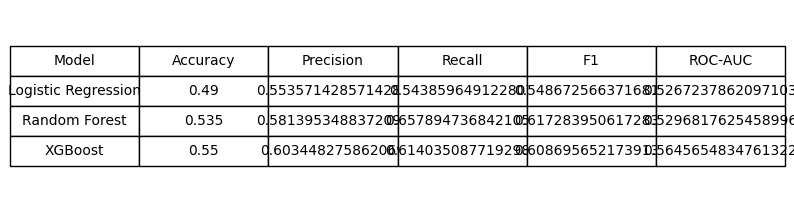

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(10, 2.5))
ax.axis('off')

# Create table
table = ax.table(
    cellText=results_tuned_df.values,
    colLabels=results_tuned_df.columns,
    loc='center',
    cellLoc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# Save image
plt.savefig("tuned_results_table.png", dpi=300, bbox_inches='tight')
plt.show()